# DecisionTreeClassifier

## Import Libraries

In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Import Dataset

In [10]:
FOLDER="Dataset"
DSName="drug200.csv"
path= os.path.join(os.getcwd(),FOLDER,DSName)
print(path)

/home/sky/ML/Project3/Project3-DrugEffectivenessClassifier/Dataset/drug200.csv


In [11]:
df = pd.read_csv(path)

## Data Exploration

In [13]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [18]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [22]:
df.shape ##200 lines, 6 variables

(200, 6)

In [32]:
#Check frequency of variable
#https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
#Result: Drug Y highest frequency
for col in df.columns:
    print(df[col].value_counts())

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64
Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Na_to_K
12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: count, Length: 198, dtype: int64
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


## Data Cleaning

In [34]:
#Check for missing values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Data Visualisation

In [36]:
value_counts = []
for col in df.columns:
    value_counts.append(df[col].value_counts())

In [37]:
value_counts[0]

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64

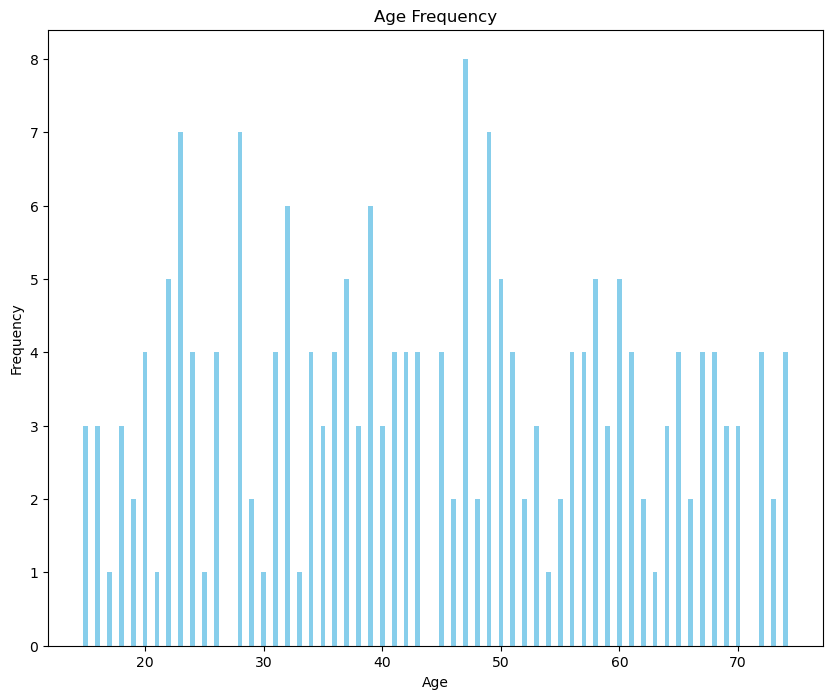

In [53]:
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/sp
#columns
age = list(value_counts[0].index)
values = list(value_counts[0].values)
  
#chart size
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(age, values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Frequency")
plt.show()




In [57]:
value_counts[5]

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

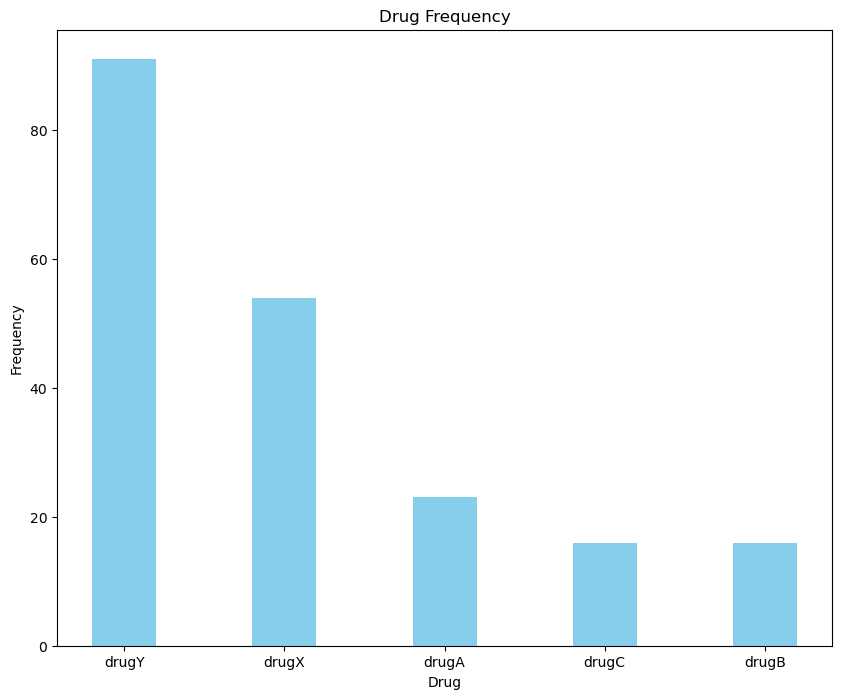

In [59]:
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/sp
#columns
drug = list(value_counts[5].index)
values = list(value_counts[5].values)
  
#chart size
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(drug, values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Drug")
plt.ylabel("Frequency")
plt.title("Drug Frequency")
plt.show()

In [63]:
value_counts[1]

Sex
M    104
F     96
Name: count, dtype: int64

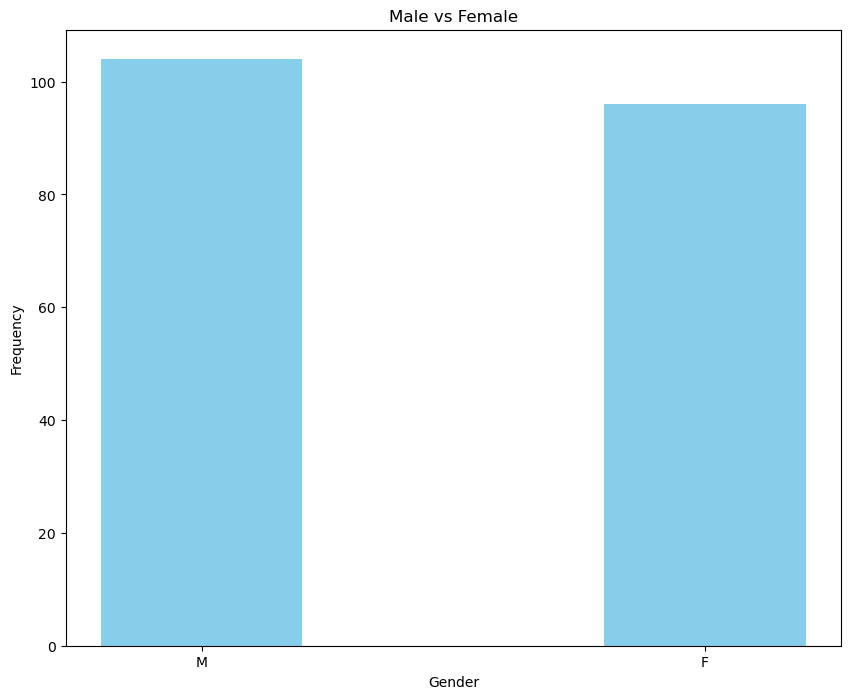

In [68]:
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/sp
#columns
sex = list(value_counts[1].index)
values = list(value_counts[1].values)
  
#chart size
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(sex, values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Male vs Female")
plt.show()

In [ ]:



X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');



## Data Encoding

In [73]:
X = df.drop(['Drug'], axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [81]:
y = df['Drug'] #Dependent variable
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

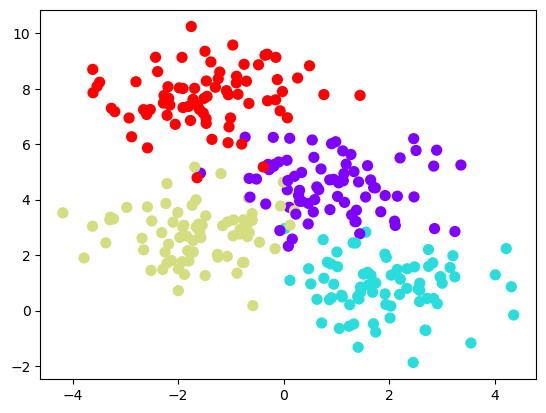

In [85]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

## Split off training data

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [111]:
X_train.shape, X_test.shape

((240, 2), (60, 2))

In [112]:
y_train.shape, y_test.shape

((240,), (60,))

## Decision Tree Classifier

In [113]:
#https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
tree = DecisionTreeClassifier().fit(X, y)

In [129]:
y_pred = tree.predict(X_test)

In [130]:
y_pred.shape

(60,)

In [131]:
# Metrics code from https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        11

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



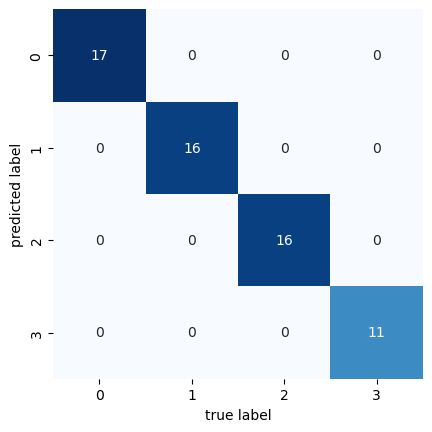

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');